# Question 1
# Airlines Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# load the dataset
data = pd.read_excel(r"C:\Users\Asus\Downloads\Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [3]:
data.shape

(96, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
data.columns

Index(['Month', 'Passengers'], dtype='object')

In [8]:
data.Month.unique()

array(['1995-01-01T00:00:00.000000000', '1995-02-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-04-01T00:00:00.000000000',
       '1995-05-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-07-01T00:00:00.000000000', '1995-08-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-10-01T00:00:00.000000000',
       '1995-11-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1996-02-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-04-01T00:00:00.000000000',
       '1996-05-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-07-01T00:00:00.000000000', '1996-08-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-10-01T00:00:00.000000000',
       '1996-11-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-01-01T00:00:00.000000000', '1997-02-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-04-01

In [9]:
data.Passengers.unique()

array([112, 118, 132, 129, 121, 135, 148, 136, 119, 104, 115, 126, 141,
       125, 149, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 199,
       184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209,
       191, 194, 196, 236, 235, 229, 243, 264, 272, 237, 211, 201, 204,
       188, 227, 234, 302, 293, 259, 203, 233, 267, 269, 270, 315, 364,
       347, 312, 274, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355,
       306, 271], dtype=int64)

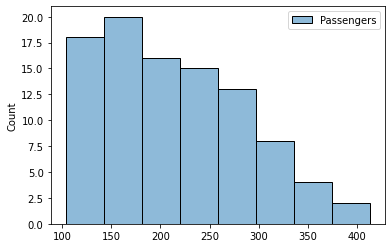

In [10]:
# histogram for plotting passager count
sns.histplot(data=data)
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


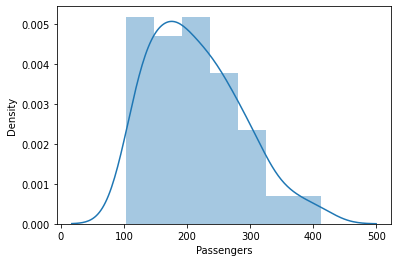

In [11]:
# to check density of passanger
sns.distplot(data.Passengers)
plt.show()

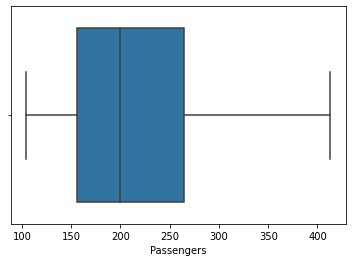

In [12]:
sns.boxplot(data=data,x='Passengers')
plt.show()

In [13]:
# no outler found

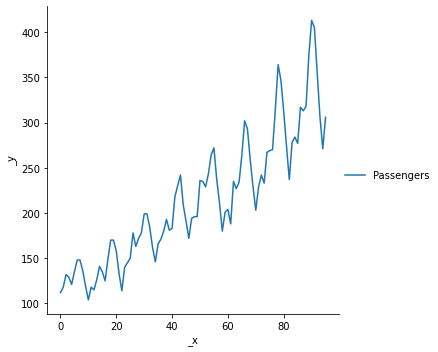

In [14]:
# line plot
sns.relplot(data=data, kind="line")
plt.show()

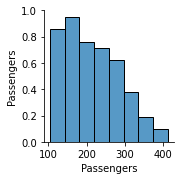

In [15]:
sns.pairplot(data)
plt.show()

In [16]:
data["month"] = data.Month.dt.strftime("%b")
data["year"] = data.Month.dt.strftime("%Y") 
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [17]:
heatmap_year_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_year_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


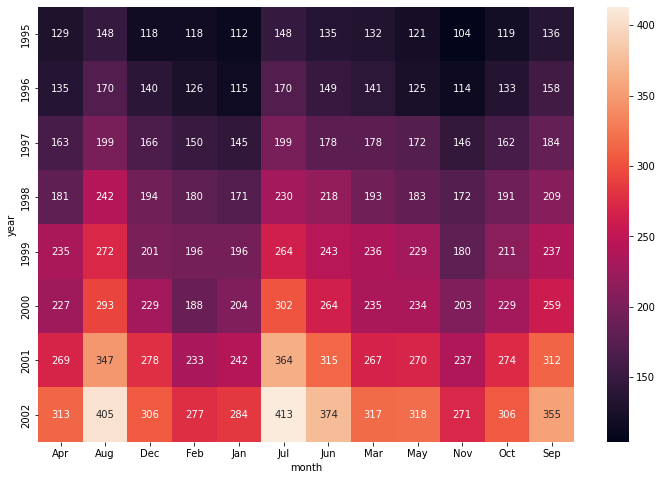

In [18]:
# 
plt.figure(figsize=(12,8))
heatmap_year_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year_month,annot=True,fmt="g")

plt.show()

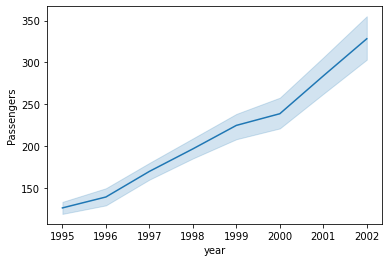

In [19]:
sns.lineplot(x="year",y="Passengers",data=data)
plt.show()

In [20]:
data

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [21]:
import datetime
data['m'] = range(1,(data.shape[0]+1))
data['m_square'] = np.power(data['m'],2)
data['log_Passengers']=np.log(data['Passengers'])
data

,Month,Passengers,month,year,m,m_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [22]:
ddf = pd.get_dummies(data.iloc[:,2],columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ddf

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
fdf = pd.concat([data,ddf],axis=1)
fdf


,Month,Passengers,month,year,m,m_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
col = ['Month', 'Passengers', 'month', 'm', 'm_square', 'year','log_Passengers', 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1 = pd.DataFrame(fdf,columns=col)
df1

,Month,Passengers,month,m,m_square,year,log_Passengers,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-01,112,Jan,1,1,1995,4.718499,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,2,4,1995,4.770685,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,3,9,1995,4.882802,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,Apr,4,16,1995,4.859812,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,5,25,1995,4.795791,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,92,8464,2002,6.003887,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-01,355,Sep,93,8649,2002,5.872118,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-01,306,Oct,94,8836,2002,5.723585,0,0,0,0,0,0,0,0,0,1,0,0
94,2002-11-01,271,Nov,95,9025,2002,5.602119,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
Train = df1.head(86)
Test = df1.tail(10)

In [26]:
# Linear Model
linear_model = smf.ols('Passengers~m',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['m'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

58.643149727782514

In [27]:
#Exponential model
Exp = smf.ols('log_Passengers~m',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['m'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

49.90312334789315

In [28]:
#Quadratic Model
Quad = smf.ols('Passengers~m+m_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["m","m_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

53.914363578525986

In [29]:
#Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

136.7901043681934

In [30]:
Mul_Add_sea = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 11.26495833035574


In [31]:
data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea,rmse_Mult_add_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,58.643150
1,rmse_Exp,49.903123
2,rmse_Quad,53.914364
3,rmse_add_sea,136.790104
4,rmse_add_sea_quad,136.790104
5,rmse_Mult_sea,11.264958
6,rmse_Mult_add_sea,11.264958


In [32]:
data = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [33]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["m"] = np.arange(1,13)   
forecast1["m_squared"] = forecast1["m"]*forecast1["m"] 
print("\nAfter Dummy, M and M-Square\n\n",forecast1.head())


After Dummy, M and M-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  m  m_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [34]:
model_full = smf.ols('log_Passengers~m+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =df1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [35]:
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,109.176148
1,2003-02-01,110.331245
2,2003-03-01,127.315234
3,2003-04-01,123.200587
4,2003-5-01,122.399578
5,2003-06-01,138.536397
6,2003-07-01,154.066959
7,2003-08-01,153.741209
8,2003-09-01,137.693733
9,2003-10-01,120.894736


# Question 2
# Coca Cola data

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

In [37]:
df = pd.read_excel(r"C:\Users\Asus\Downloads\CocaCola_Sales_Rawdata.xlsx")

In [38]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [39]:
df1 = df.copy()

In [40]:
df1

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [41]:
df1.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [42]:
df1.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [43]:
df1.dtypes

Quarter     object
Sales      float64
dtype: object

In [44]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,42.0,2994.353308,977.930896,1547.818996,2159.714247,2782.376999,3609.25,5253.0


In [45]:
temp = df1.Quarter.str.replace(r'(Q\d)_(\d+)', r'19\2-\1')

In [46]:
df1['quater'] = pd.to_datetime(temp).dt.strftime('%b-%Y')

In [47]:
df1.head()

,Quarter,Sales,quater
0,Q1_86,1734.827000,Jan-1986
1,Q2_86,2244.960999,Apr-1986
2,Q3_86,2533.804993,Jul-1986
3,Q4_86,2154.962997,Oct-1986
4,Q1_87,1547.818996,Jan-1987


In [48]:
df1 = df1.drop(['Quarter'], axis=1)

In [49]:
df1.reset_index(inplace=True)

In [50]:
df1['quater'] = pd.to_datetime(df1['quater'])

In [51]:
df1 = df1.set_index('quater')

In [52]:
df1

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996
1987-04-01,5,2104.411995
1987-07-01,6,2014.362999
1987-10-01,7,1991.746998
1988-01-01,8,1869.049999


In [53]:
df1.head()

,index,Sales
quater,,
1986-01-01,0,1734.827000
1986-04-01,1,2244.960999
1986-07-01,2,2533.804993
1986-10-01,3,2154.962997
1987-01-01,4,1547.818996


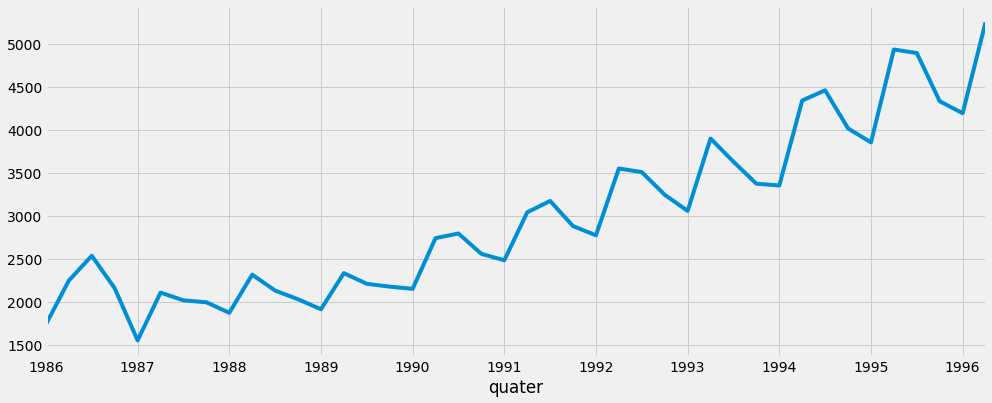

In [54]:
#
df1['Sales'].plot(figsize=(15, 6))
plt.show()

# from 1986 to 1987 co cocola sales are incresing and after sometime sales falls 1987 then 1987 to 1996 cola sales increasing in upward direction

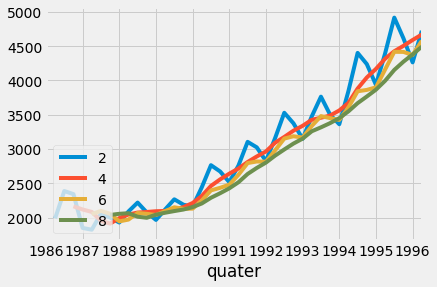

In [55]:
for i in range(2,10,2):
    df1["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

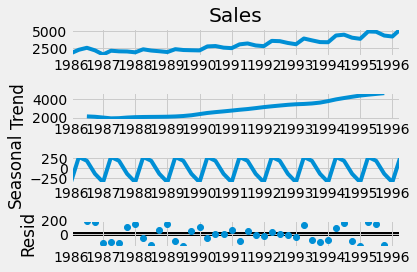

In [56]:
ts_add = seasonal_decompose(df1.Sales,model="additive")
fig = ts_add.plot()
plt.show()
plt.show()

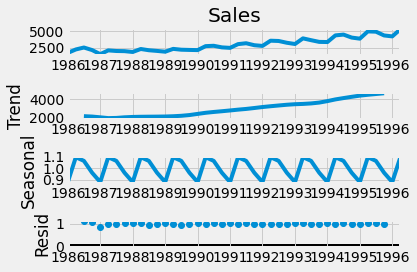

In [57]:
ts_mul = seasonal_decompose(df1.Sales,model="multiplicative")
fig = ts_mul.plot()
plt.show()

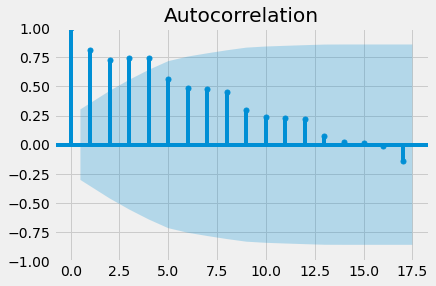

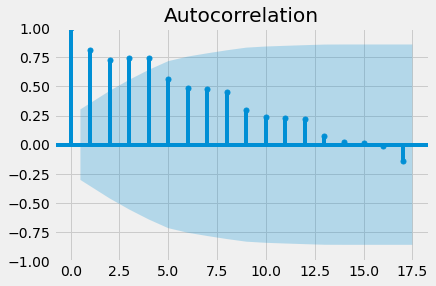

In [58]:
tsa_plots.plot_acf(df1.Sales)

In [59]:
#Building Time series forecasting with ARIMA
X = df1['Sales'].values

In [60]:
size = int(len(X) * 0.66)

In [61]:
train, test = X[0:size], X[size:len(X)]

In [62]:
from statsmodels.tsa.arima.model import ARIMA

In [63]:
model = ARIMA(train, order=(5,1,0))

In [64]:
model 

In [65]:
model_fit = model.fit()

In [66]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -174.082
Date:                Fri, 07 Apr 2023   AIC                            360.163
Time:                        15:08:19   BIC                            367.712
Sample:                             0   HQIC                           362.337
                                 - 27                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1024      0.306     -0.335      0.738      -0.702       0.497
ar.L2         -0.2140      0.160     -1.338      0.181      -0.527       0.099
ar.L3         -0.0892      0.191     -0.468      0.6

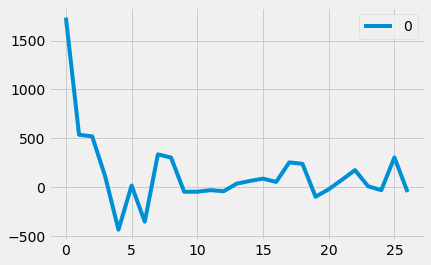

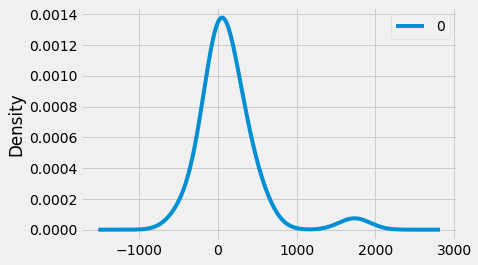

                 0
count    27.000000
mean    137.791854
std     385.970461
min    -433.659592
25%     -34.938855
50%      55.067398
75%     247.080156
max    1734.827000


In [67]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [68]:
#Rolling forecast ARIMA
history = [x for x in train]

In [69]:

history = [x for x in train]

In [70]:
predictions = list()

In [71]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3130.132558, expected=3243.859993
predicted=3167.315970, expected=3056.000000
predicted=3717.472605, expected=3899.000000
predicted=3775.837498, expected=3629.000000
predicted=3332.741491, expected=3373.000000
predicted=3258.580648, expected=3352.000000
predicted=4081.006045, expected=4342.000000
predicted=3955.784539, expected=4461.000000
predicted=4146.277854, expected=4017.000000
predicted=3958.437255, expected=3854.000000
predicted=4701.652909, expected=4936.000000
predicted=4990.072040, expected=4895.000000
predicted=4390.352785, expected=4333.000000
predicted=4190.883847, expected=4194.000000
predicted=5177.117696, expected=5253.000000


In [72]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 34278.759


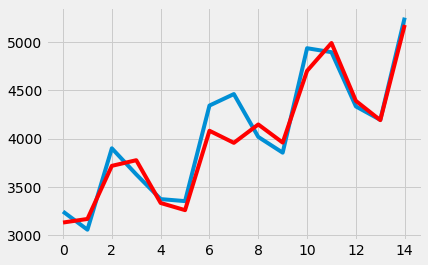

In [73]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [74]:
df2 = pd.get_dummies(df, columns = ['Quarter'])

In [75]:
df2.columns = ['Sales','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q1','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q2','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q3','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4','Q4']
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2154.962997,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
t= np.arange(1,43)

In [77]:
df2['t'] = t

In [78]:
df2['t_sq'] = df2['t']*df2['t']
log_Sales=np.log(df2['Sales'])
df2['log_Sales']=log_Sales
df2.head()

,Sales,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,t,t_sq,log_Sales
0,1734.827000,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,7.458663
1,2244.960999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4,7.716443
2,2533.804993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,9,7.837477
3,2154.962997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,16,7.675529
4,1547.818996,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,25,7.344602


In [79]:
train1, test1 = np.split(df2, [int(.67 *len(df2))])

In [80]:
#Linear
linear= smf.ols('Sales ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Sales'])-np.array(predlin))**2))
rmselin

580.1224130918641

In [81]:
#Quad
quad=smf.ols('Sales~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predquad))**2))
rmsequad

783.7297975037103

In [82]:
#Expo
expo=smf.ols('log_Sales~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

588.1405104900134

In [83]:
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predadd))**2))
rmseadd


1869.7188209186947

In [84]:
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear


596.1526282372472

In [85]:
addquad=smf.ols('Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(predaddquad))**2))
rmseaddquad

412.1144436053775

In [86]:
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2374.9194407954374

In [87]:
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

5359.687911932085

In [88]:
mul_quad= smf.ols('log_Sales~t+t_sq+Q1+Q2+Q3+Q4',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

3630.5619467347524

In [89]:

output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [90]:
rmse=pd.DataFrame(output)

In [91]:
rmse

,Model,Values
0,rmse_mul_quad,3630.561947
1,rmseadd,1869.718821
2,rmseaddlinear,596.152628
3,rmseaddquad,412.114444
4,rmseexpo,588.140510
5,rmselin,580.122413
6,rmsemul,2374.919441
7,rmsemulin,5359.687912
8,rmsequad,783.729798
